In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Define the path to the dataset folder
dataset_folder = "../dataset/original_data/"


# Load datasets
train_purchases = pd.read_csv(os.path.join(dataset_folder, "train_purchases.csv"))
train_sessions = pd.read_csv(os.path.join(dataset_folder, "train_sessions.csv"))
item_features = pd.read_csv(os.path.join(dataset_folder, "item_features.csv"))
candidate_items = pd.read_csv(os.path.join(dataset_folder, "candidate_items.csv"))
test_full_sessions = pd.read_csv(os.path.join(dataset_folder, "test_full_sessions.csv"))
test_full_purchases = pd.read_csv(os.path.join(dataset_folder, "test_full_purchases.csv"))
test_leaderboard_sessions = pd.read_csv(os.path.join(dataset_folder, "test_leaderboard_sessions.csv"))
test_leaderboard_purchases = pd.read_csv(os.path.join(dataset_folder, "test_leaderboard_purchases.csv"))
test_final_sessions = pd.read_csv(os.path.join(dataset_folder, "test_final_sessions.csv"))
test_final_purchases = pd.read_csv(os.path.join(dataset_folder, "test_final_purchases.csv"))

In [3]:
# Data exploration
# 1. Initial Inspection
print("Train Purchases:")
print(train_purchases.head())
print("\nTrain Sessions:")
print(train_sessions.head())
print("\nItem Features:")
print(item_features.head())
print("\nCandidate Items:")
print(candidate_items.head())

Train Purchases:
   session_id  item_id                     date
0           3    15085  2020-12-18 21:26:47.986
1          13    18626  2020-03-13 19:36:15.507
2          18    24911  2020-08-26 19:20:32.049
3          19    12534   2020-11-02 17:16:45.92
4          24    13226  2020-02-26 18:27:44.114

Train Sessions:
   session_id  item_id                     date
0           3     9655  2020-12-18 21:25:00.373
1           3     9655  2020-12-18 21:19:48.093
2          13    15654  2020-03-13 19:35:27.136
3          18    18316  2020-08-26 19:18:30.833
4          18     2507  2020-08-26 19:16:31.211

Item Features:
   item_id  feature_category_id  feature_value_id
0        2                   56               365
1        2                   62               801
2        2                   68               351
3        2                   33               802
4        2                   72                75

Candidate Items:
   item_id
0        4
1        8
2        9
3       19
4

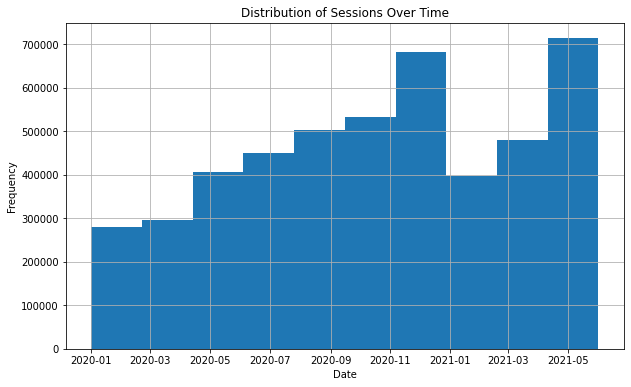

Session Length Summary Statistics:
count    1000000.000000
mean           4.743820
std            6.084665
min            1.000000
25%            1.000000
50%            3.000000
75%            6.000000
max          100.000000
dtype: float64


In [5]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
train_sessions['date'] = pd.to_datetime(train_sessions['date'])
train_sessions['date'].hist()
plt.title('Distribution of Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for session length
session_lengths = train_sessions.groupby('session_id').size()
print("Session Length Summary Statistics:")
print(session_lengths.describe())


In [9]:
# 3. Exploring Item Features
# Distribution of feature categories
feature_counts = item_features['feature_category_id'].value_counts()
print("Feature Category Counts:")
print(feature_counts)

Feature Category Counts:
56    23691
47    23691
50    23077
68    23038
61    22512
      ...  
52      568
54      341
9       137
13      137
27        1
Name: feature_category_id, Length: 73, dtype: int64


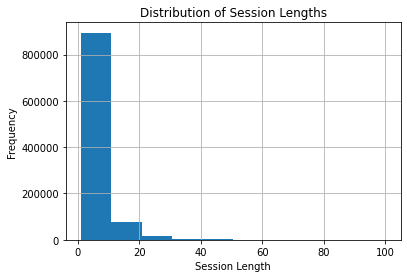

In [10]:

# 4. Session Analysis
# Session length distribution
session_lengths.hist()
plt.title('Distribution of Session Lengths')
plt.xlabel('Session Length')
plt.ylabel('Frequency')
plt.show()

In [11]:

# 5. Candidate Items
print("Number of Candidate Items:", len(candidate_items))

Number of Candidate Items: 4990


In [13]:
# 6. Test Data Analysis
# Distribution of sessions and purchases in test sets
print("Test Full Sessions:")
print(test_full_sessions.head())
print("\nTest Leaderboard Sessions:")
print(test_leaderboard_sessions.head())
print("\nTest Final Sessions:")
print(test_final_sessions.head())


Test Full Sessions:
   session_id  item_id                     date
0          26    19185  2021-06-16 09:53:54.158
1          61    27088  2021-06-01 08:12:39.664
2          61     5581  2021-06-01 08:12:40.534
3          96    11693  2021-06-19 17:48:05.227
4          96    18298  2021-06-19 17:49:08.589

Test Leaderboard Sessions:
   session_id  item_id                     date
0          26    19185  2021-06-16 09:53:54.158
1         200    17089  2021-06-25 12:23:40.811
2         200    17089  2021-06-25 12:24:36.631
3         200     8060  2021-06-25 12:24:41.677
4         200     4758  2021-06-25 12:24:50.692

Test Final Sessions:
   session_id  item_id                     date
0          61    27088  2021-06-01 08:12:39.664
1          96    11693  2021-06-19 17:48:05.227
2          96    18298  2021-06-19 17:49:08.589
3          96     4738  2021-06-19 17:49:15.838
4          96      495   2021-06-19 17:49:20.88


In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

dataset_folder="../dataset/original_data"
# Load the datasets
train_sessions = pd.read_csv(os.path.join(dataset_folder, "train_sessions.csv"))
# 1. Date Related Features
# Convert date column to datetime
train_sessions['date'] = pd.to_datetime(train_sessions['date'])

# Extract starting and ending DateTime features
train_sessions['start_hour'] = train_sessions['date'].dt.hour
train_sessions['end_hour'] = (train_sessions['date'] + pd.Timedelta(days=1)).dt.hour
train_sessions['start_minute'] = train_sessions['date'].dt.minute
train_sessions['end_minute'] = (train_sessions['date'] + pd.Timedelta(days=1)).dt.minute

# Apply sine and cosine transformations to capture cyclic nature of time
train_sessions['start_hour_sin'] = np.sin(2 * np.pi * train_sessions['start_hour'] / 24)
train_sessions['start_hour_cos'] = np.cos(2 * np.pi * train_sessions['start_hour'] / 24)
train_sessions['end_hour_sin'] = np.sin(2 * np.pi * train_sessions['end_hour'] / 24)
train_sessions['end_hour_cos'] = np.cos(2 * np.pi * train_sessions['end_hour'] / 24)
train_sessions['start_minute_sin'] = np.sin(2 * np.pi * train_sessions['start_minute'] / 60)
train_sessions['start_minute_cos'] = np.cos(2 * np.pi * train_sessions['start_minute'] / 60)
train_sessions['end_minute_sin'] = np.sin(2 * np.pi * train_sessions['end_minute'] / 60)
train_sessions['end_minute_cos'] = np.cos(2 * np.pi * train_sessions['end_minute'] / 60)

# Drop intermediate columns
train_sessions.drop(['start_hour', 'end_hour', 'start_minute', 'end_minute'], axis=1, inplace=True)

# 2. Session Properties Features
# Number of items seen in the session
train_sessions['num_items'] = train_sessions.groupby('session_id')['item_id'].transform('count')

# Session length in seconds
train_sessions['session_length'] = (train_sessions.groupby('session_id')['date'].transform('max') - train_sessions['date']).dt.total_seconds()

# Average time spent looking at an item
train_sessions['avg_time_per_item'] = train_sessions['session_length'] / train_sessions['num_items']

# User went AFK feature
train_sessions['user_went_afk'] = (train_sessions['avg_time_per_item'] > 30 * 60).astype(int)

# 3. Special Dates
# Example: Encoding Christmas period and Black Friday week as boolean features
train_sessions['is_christmas'] = (train_sessions['date'].dt.month == 12).astype(int)
train_sessions['is_black_friday'] = ((train_sessions['date'].dt.month == 11) & (train_sessions['date'].dt.week >= 47)).astype(int)

# Example: Encoding hot hour between 18:00 and 20:00
train_sessions['hot_hour'] = ((train_sessions['date'].dt.hour >= 18) & (train_sessions['date'].dt.hour < 20)).astype(int)

# 4. Session Similarity
# Example: Using Singular Value Decomposition (SVD) to measure session similarity
# Assume 'item_features' contains item feature vectors

# Group items seen in each session and construct feature vectors
session_item_features = train_sessions.groupby('session_id')['item_id'].apply(lambda x: item_features.loc[x]['feature_value_id'].values)

# Stack the feature vectors in columns
session_item_features_stacked = pd.DataFrame(session_item_features.tolist(), index=session_item_features.index)

# Fill missing values (if any)
session_item_features_stacked.fillna(0, inplace=True)

# Normalize the feature vectors
session_item_features_stacked_normalized = session_item_features_stacked.div(session_item_features_stacked.sum(axis=1), axis=0)

# Perform SVD
svd = TruncatedSVD(n_components=1, random_state=42)
session_similarity = svd.fit_transform(session_item_features_stacked_normalized)

# Assign session similarity measure to the original dataframe
train_sessions['session_similarity'] = session_similarity

# Display the modified dataframe
print(train_sessions.head())


/tmp/ipykernel_3097/1447107601.py:47: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_sessions['is_black_friday'] = ((train_sessions['date'].dt.month == 11) & (train_sessions['date'].dt.week >= 47)).astype(int)


: 

: 